In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [1]:
import pandas as pd
import xarray as xr

import numpy as np
import pandas as pd
from sklearn import preprocessing
# import seaborn as sns

/opt/conda/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fn_land = 'Data/land_cover_data.nc'
fn_weather = 'Data/dataset_weather_for_model.nc'
fn_conc = 'Data/conc_dataset.nc'
fn_traffic = 'Data/emissions_traffic_hourly_merged.nc'

#Load datasets

##Land

In [ ]:
# Open netCDF file 
land = xr.open_dataset(fn_land)
land

<xarray.Dataset>
Dimensions:       (lat: 33, lon: 33, time: 30)
Coordinates:
  * time          (time) datetime64[ns] 2019-05-01 2019-05-02 ... 2019-05-30
  * lon           (lon) float64 4.0 4.25 4.5 4.75 5.0 ... 11.25 11.5 11.75 12.0
  * lat           (lat) float64 43.0 43.25 43.5 43.75 ... 50.25 50.5 50.75 51.0
Data variables:
    height        (time, lat, lon) float32 ...
    built         (time, lat, lon) float32 ...
    NO emissions  (time, lat, lon) float32 ...

In [ ]:
land_fixed = land.drop_vars('NO emissions') #They are already in the weather dataset
hours = np.arange(0,24,1)
land_fixed = land_fixed.expand_dims({'Hours':hours})
land_fixed = land_fixed.assign_coords(time=land_fixed.time.dt.day)
land_fixed = land_fixed.rename({'time':'Days'})
land_fixed = land_fixed.rename({'lon':'long'})
land_fixed = land_fixed.transpose('lat','long','Days','Hours')  
land_fixed

<xarray.Dataset>
Dimensions:  (Days: 30, Hours: 24, lat: 33, long: 33)
Coordinates:
  * Hours    (Hours) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
  * Days     (Days) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
  * long     (long) float64 4.0 4.25 4.5 4.75 5.0 ... 11.0 11.25 11.5 11.75 12.0
  * lat      (lat) float64 43.0 43.25 43.5 43.75 44.0 ... 50.25 50.5 50.75 51.0
Data variables:
    height   (lat, long, Days, Hours) float32 0.0 0.0 0.0 0.0 ... nan nan nan
    built    (lat, long, Days, Hours) float32 0.0 0.0 0.0 0.0 ... nan nan nan

##Weather

In [ ]:
weather = xr.open_dataset(fn_weather)
weather

<xarray.Dataset>
Dimensions:            (Days: 31, Hours: 24, latitude: 33, longitude: 33)
Coordinates:
  * latitude           (latitude) float64 43.0 43.25 43.5 ... 50.5 50.75 51.0
  * longitude          (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * Days               (Days) int64 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * Hours              (Hours) int64 0 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22 23
Data variables: (12/15)
    EMISSIONS_2019     (latitude, longitude, Days, Hours) float64 ...
    u10                (latitude, longitude, Days, Hours) float64 ...
    v10                (latitude, longitude, Days, Hours) float64 ...
    hcc                (latitude, longitude, Days, Hours) float64 ...
    lcc                (latitude, longitude, Days, Hours) float64 ...
    tcc                (latitude, longitude, Days, Hours) float64 ...
    ...                 ...
    sp_hum             (latitude, longitude, Days, Hours) float64 ...
    tcwv               (latitude, longitude, Days, Hours) float64 ...
    tcw                (latitude, longitude, Days, Hours) float64 ...
    tot_wind           (latitude, longitude, Days, Hours) float64 ...
    tmp_shifted_9      (latitude, longitude, Days, Hours) float64 ...
    rel_hum_shifted_9  (latitude, longitude, Days, Hours) float64 ...

In [ ]:
#These variables are also in another dataset
weather_fixed = weather.drop_vars('tcw')
weather_fixed = weather_fixed.drop_vars('tcwv')
weather_fixed = weather_fixed.rename({'longitude':'long'})
weather_fixed = weather_fixed.rename({'latitude':'lat'})
weather_fixed = weather_fixed.transpose('lat','long','Days','Hours')  
weather_fixed

<xarray.Dataset>
Dimensions:            (Days: 31, Hours: 24, lat: 33, long: 33)
Coordinates:
  * lat                (lat) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * long               (long) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * Days               (Days) int64 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * Hours              (Hours) int64 0 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22 23
Data variables: (12/13)
    EMISSIONS_2019     (lat, long, Days, Hours) float64 ...
    u10                (lat, long, Days, Hours) float64 ...
    v10                (lat, long, Days, Hours) float64 ...
    hcc                (lat, long, Days, Hours) float64 ...
    lcc                (lat, long, Days, Hours) float64 ...
    tcc                (lat, long, Days, Hours) float64 ...
    ...                 ...
    cvh                (lat, long, Days, Hours) float64 ...
    sp                 (lat, long, Days, Hours) float64 ...
    sp_hum             (lat, long, Days, Hours) float64 ...
    tot_wind           (lat, long, Days, Hours) float64 ...
    tmp_shifted_9      (lat, long, Days, Hours) float64 ...
    rel_hum_shifted_9  (lat, long, Days, Hours) float64 ...

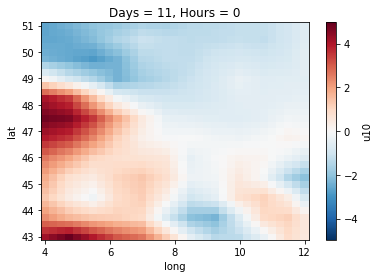

In [ ]:
weather_fixed.isel(Days=[10], Hours=[0]).u10.plot()

##Conc

In [ ]:
conc = xr.open_dataset(fn_conc)
conc

<xarray.Dataset>
Dimensions:  (Days: 31, Hours: 8, lat: 31, long: 31)
Coordinates:
  * lat      (lat) float64 43.0 43.25 43.5 43.75 44.0 ... 49.75 50.0 50.25 50.5
  * long     (long) float64 4.0 4.25 4.5 4.75 5.0 ... 10.5 10.75 11.0 11.25 11.5
  * Days     (Days) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * Hours    (Hours) int64 0 3 6 9 12 15 18 21
Data variables:
    tcco     (lat, long, Days, Hours) float64 ...
    tcno2    (lat, long, Days, Hours) float64 ...
    tc_no    (lat, long, Days, Hours) float64 ...
    gtco3    (lat, long, Days, Hours) float64 ...
    tcwv     (lat, long, Days, Hours) float64 ...

In [ ]:
conc_fidex=conc
hour_bins = np.arange(0,24,1)
conc_fidex = conc_fidex.interp(Hours=hour_bins, method="linear")
conc_fidex = conc_fidex.transpose('lat','long','Days','Hours')  
conc_fidex

<xarray.Dataset>
Dimensions:  (Days: 31, Hours: 24, lat: 31, long: 31)
Coordinates:
  * lat      (lat) float64 43.0 43.25 43.5 43.75 44.0 ... 49.75 50.0 50.25 50.5
  * long     (long) float64 4.0 4.25 4.5 4.75 5.0 ... 10.5 10.75 11.0 11.25 11.5
  * Days     (Days) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * Hours    (Hours) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Data variables:
    tcco     (lat, long, Days, Hours) float64 0.0009544 0.0009548 ... nan nan
    tcno2    (lat, long, Days, Hours) float64 3.432e-06 3.334e-06 ... nan nan
    tc_no    (lat, long, Days, Hours) float64 9.295e-10 9.842e-10 ... nan nan
    gtco3    (lat, long, Days, Hours) float64 0.007882 0.007857 ... nan nan
    tcwv     (lat, long, Days, Hours) float64 14.48 14.07 13.67 ... nan nan

#Traffic

In [ ]:
traffic = xr.open_dataset(fn_traffic)
traffic

<xarray.Dataset>
Dimensions:    (hour: 24, latitude: 60, longitude: 61)
Coordinates:
  * longitude  (longitude) float32 4.0 4.1 4.2 4.3 4.4 ... 9.6 9.7 9.8 9.9 10.0
  * latitude   (latitude) float32 43.05 43.15 43.25 43.35 ... 48.75 48.85 48.95
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Data variables:
    emissions  (hour, latitude, longitude) float32 ...
    traffic    (hour, latitude, longitude) float32 ...

In [ ]:
traffic_fixed=traffic.drop_vars('emissions')
lat_bins = np.arange(43,51.25,0.25)
lon_bins = np.arange(4,12.25,0.25)
traffic_fixed = traffic_fixed.sortby(['latitude','longitude','hour'])  
traffic_fixed = traffic_fixed.interp(latitude=lat_bins, longitude=lon_bins, method="linear")
days = np.arange(1,32,1)
traffic_fixed=traffic_fixed.expand_dims({'Days':days})
traffic_fixed=traffic_fixed.rename({'hour':'Hours'})
traffic_fixed=traffic_fixed.rename({'longitude':'long'})
traffic_fixed=traffic_fixed.rename({'latitude':'lat'})
traffic_fixed=traffic_fixed.transpose('lat','long','Days','Hours')  
traffic_fixed

<xarray.Dataset>
Dimensions:  (Days: 31, Hours: 24, lat: 33, long: 33)
Coordinates:
  * Days     (Days) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * Hours    (Hours) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
  * lat      (lat) float64 43.0 43.25 43.5 43.75 44.0 ... 50.25 50.5 50.75 51.0
  * long     (long) float64 4.0 4.25 4.5 4.75 5.0 ... 11.0 11.25 11.5 11.75 12.0
Data variables:
    traffic  (lat, long, Days, Hours) float64 nan nan nan nan ... nan nan nan

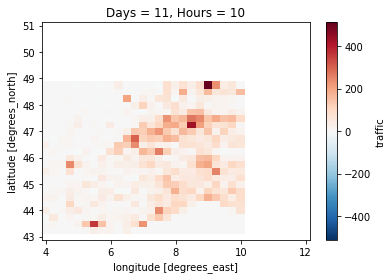

In [ ]:
traffic_fixed.isel(Days=[10], Hours=[10]).traffic.plot()

#Merge

In [ ]:
tot_dataset = weather_fixed.merge(land_fixed)
tot_dataset = tot_dataset.merge(conc_fidex)
tot_dataset = tot_dataset.merge(traffic_fixed)

tot_dataset

<xarray.Dataset>
Dimensions:            (Days: 31, Hours: 24, lat: 33, long: 33)
Coordinates:
  * lat                (lat) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * long               (long) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
  * Days               (Days) int64 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * Hours              (Hours) int64 0 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22 23
Data variables: (12/21)
    EMISSIONS_2019     (lat, long, Days, Hours) float64 ...
    u10                (lat, long, Days, Hours) float64 ...
    v10                (lat, long, Days, Hours) float64 ...
    hcc                (lat, long, Days, Hours) float64 ...
    lcc                (lat, long, Days, Hours) float64 ...
    tcc                (lat, long, Days, Hours) float64 ...
    ...                 ...
    tcco               (lat, long, Days, Hours) float64 0.0009544 ... nan
    tcno2              (lat, long, Days, Hours) float64 3.432e-06 ... nan
    tc_no              (lat, long, Days, Hours) float64 9.295e-10 ... nan
    gtco3              (lat, long, Days, Hours) float64 0.007882 ... nan
    tcwv               (lat, long, Days, Hours) float64 14.48 14.07 ... nan nan
    traffic            (lat, long, Days, Hours) float64 nan nan nan ... nan nan

In [ ]:
df = tot_dataset.to_dataframe()
df.head()

EMISSIONS_2019  u10  v10  ...     gtco3       tcwv  traffic
  Hours                                      ...                              
1 0     43.0 4.00             NaN  NaN  NaN  ...  0.007882  14.479529      NaN
             4.25             NaN  NaN  NaN  ...  0.007854  14.662142      NaN
             4.50             NaN  NaN  NaN  ...  0.007826  14.844755      NaN
             4.75             NaN  NaN  NaN  ...  0.007798  15.027369      NaN
             5.00             NaN  NaN  NaN  ...  0.007779  14.954130      NaN

[5 rows x 21 columns]

In [ ]:
tot_dataset.to_netcdf('dataset_complete_for_model.nc', 'w', 'NETCDF4')

#Check

In [ ]:
df_clean = df.dropna()
df_clean.head()

EMISSIONS_2019       u10  ...       tcwv  traffic
  Hours                                       ...                    
1 1     43.25 4.00    1.575121e-12  2.410286  ...  13.522210      0.0
              4.25    1.106813e-12  2.419098  ...  13.703443      0.0
              4.50    8.896030e-13  2.427910  ...  13.884675      0.0
              4.75    1.368838e-12  2.436721  ...  14.065908      0.0
              5.00    1.921552e-11  2.065145  ...  14.054275      0.0

[5 rows x 21 columns]

In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 810216 entries, (1, 0, 43.0, 4.0) to (31, 23, 51.0, 12.0)
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EMISSIONS_2019     784080 non-null  float64
 1   u10                784080 non-null  float64
 2   v10                784080 non-null  float64
 3   hcc                784080 non-null  float64
 4   lcc                784080 non-null  float64
 5   tcc                784080 non-null  float64
 6   cvl                784080 non-null  float64
 7   cvh                784080 non-null  float64
 8   sp                 784080 non-null  float64
 9   sp_hum             784080 non-null  float64
 10  tot_wind           784080 non-null  float64
 11  tmp_shifted_9      784071 non-null  float64
 12  rel_hum_shifted_9  784071 non-null  float64
 13  height             760320 non-null  float32
 14  built              760320 non-null  float32
 15  tcco               65

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 378925 entries, (1, 1, 43.25, 4.0) to (30, 21, 48.75, 10.0)
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EMISSIONS_2019     378925 non-null  float64
 1   u10                378925 non-null  float64
 2   v10                378925 non-null  float64
 3   hcc                378925 non-null  float64
 4   lcc                378925 non-null  float64
 5   tcc                378925 non-null  float64
 6   cvl                378925 non-null  float64
 7   cvh                378925 non-null  float64
 8   sp                 378925 non-null  float64
 9   sp_hum             378925 non-null  float64
 10  tot_wind           378925 non-null  float64
 11  tmp_shifted_9      378925 non-null  float64
 12  rel_hum_shifted_9  378925 non-null  float64
 13  height             378925 non-null  float32
 14  built              378925 non-null  float32
 15  tcco               